# Lady Tasting Tea - An Investigation

![Ronald Fisher](https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG)

The Lady Tasting Tea problem was first described by [Ronald A. Fisher](http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html) in his book The Design of Experiments.

He described the problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

## Number of ways of selecting cups

In this section we investigate the number of ways in which the lady can arrange the eight cups into two sets of four - the cups with milk first and the cups with tea first. To begin we give each of the eight cups a label from 0 to 7. Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [1]:
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

Suppose the subject is trying to pick the four cups with milk in first. If the subject is picking the cups randomly (i.e. if they can't really tell which cups have the milk in first), then they are randomly picking one of seventy different options. Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four unordered items from eight is given by the [Choose](http://mathworld.wolfram.com/Choose.html) function in mathematics.

In [2]:
(8*7*6*5)/(4*3*2*1)

70.0

These possibilities can be enumerated using the combinations function from the itertools Python package. it takes a list $l$ of items and a number $n$. It returns/generates each way of selecting $n$ unordered items from $l$.

In [3]:
import itertools

poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

## Hypthoeses

In the book, Fisher describes the *null hypothesis*. It is the statement to be countered by the experiment. In this case it is the hypothesis that the subject cannot tell the difference between a cup of coffee that had milk in it first and one that had the tea in it first.

**Null Hypothesis:** the subject can not tell if the cup had milk in it first or last.

Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true. If it is very unlikely, then we may reject the null hypothesis. Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.


**Alternative Hypothesis:** the subject can tell.

Should the subject pick the correct four cups with milk in them first, these is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing. Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [4]:
1 / 70

0.014285714285714285

## Distribution

We may be tempted to allow the possibility of rejecting the null hypothesis if the subject gets three cups right. That would be a mistake, as the following plot shows. It shows the null distribution, the number of ways of guessing for each number of correct cups. We can see from the plot that there is ~20% chance of guessing at least three correct cups. I don't think that's unlikely enough to reject the null hypothesis.

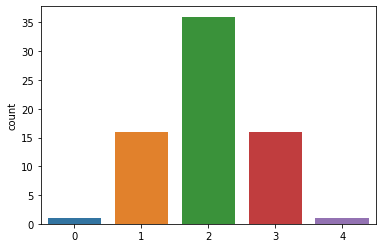

In [5]:
import random
import seaborn as sns

# Pick a random correct answer from the list of 70 to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# Creat the plot.
sns.countplot(x=counts);

## End